**<center><font size = "6">Actividad grupal: Detección de anomalías y técnicas de agrupamiento<center>**
***

In [1]:
# Tratamiento de datos
#==================================================
import pandas as pd
import numpy as np
# Gráficos
#==================================
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# Deteccion de anomalias
#==================================================
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
# Tecnicas de agrupamiento
# ==================================================
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
# Ajuste ancho de pantalla del Notebook para una mejor visualizacion de datos
#==================================
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

## 1. Importación del dataset

El dataset seleccionado para realizar el análisis es del Kaggle: https://www.kaggle.com/datasets/akshat0007/fetalhr

Tras leer la página de Kaggle donde se han importado los datos, podemos saber que el dataset contiene información sobre los exámenes de CTG en fetos, que son exámenes que miden su ritmo cardíaco y ayudan a los médicos a determinar si el feto está sano o si necesita atención médica adicional.

In [2]:
dataframe = pd.read_csv('CTG.csv')
dataframe

FileName       Date      SegFile       b       e    LBE     LB   AC  \
0     Variab10.txt  12/1/1996  CTG0001.txt   240.0   357.0  120.0  120.0  0.0   
1       Fmcs_1.txt   5/3/1996  CTG0002.txt     5.0   632.0  132.0  132.0  4.0   
2       Fmcs_1.txt   5/3/1996  CTG0003.txt   177.0   779.0  133.0  133.0  2.0   
3       Fmcs_1.txt   5/3/1996  CTG0004.txt   411.0  1192.0  134.0  134.0  2.0   
4       Fmcs_1.txt   5/3/1996  CTG0005.txt   533.0  1147.0  132.0  132.0  4.0   
...            ...        ...          ...     ...     ...    ...    ...  ...   
2124  S8001045.dsp   6/6/1998  CTG2127.txt  1576.0  3049.0  140.0  140.0  1.0   
2125  S8001045.dsp   6/6/1998  CTG2128.txt  2796.0  3415.0  142.0  142.0  1.0   
2126           NaN        NaN          NaN     NaN     NaN    NaN    NaN  NaN   
2127           NaN        NaN          NaN     NaN     NaN    NaN    NaN  NaN   
2128           NaN        NaN          NaN     NaN     NaN    NaN    NaN  NaN   

         FM    UC  ...    C    D    E   AD   DE   LD   FS  SUSP  CLASS  NSP  
0       0.0   0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0    9.0  2.0  
1       0.0   4.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
2       0.0   5.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
3       0.0   6.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
4       0.0   5.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    2.0  1.0  
...     ...   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...    ...  ...  
2124    0.0   9.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0   0.0    5.0  2.0  
2125    1.0   5.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    1.0  1.0  
2126    NaN   NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN    NaN  NaN  
2127    NaN   NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN    NaN  NaN  
2128  564.0  23.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN    NaN  NaN  

[2129 rows x 40 columns]

Información del dataset importado contenido en el archivo names.txt:

| Atributo | Descripción | Tipo |
| --- | --- | --- |
| FileName | Es el nombre del archivo que contiene el registro del examen de CTG. | object |
| Date | Es la fecha en que se realizó el examen de CTG. | object |
| SegFile | Nombre del archivo que contiene los datos de la examinación cardiológica fetal. | object |
| b | Es el instante de inicio del examen de CTG. | float64 |
| e | Es el instante final del examen de CTG. | float64 |
| LBE | Es el valor baso lineal (línea base) del examen, según un especialista médico. | float64 |
| LB | Es el valor baso lineal (línea base) del examen, según el software SisPorto. | float64 |
| AC | Son las aceleraciones (cambios rápidos en la frecuencia cardíaca) registradas por el software SisPorto. | float64 |
| FM | Son los movimientos fetales (movimientos del feto) registrados por el software SisPorto. | float64 |
| UC | Son las contracciones uterinas (contracciones del útero) registradas por el software SisPorto. | float64 |
| ASTV | Es el porcentaje de tiempo con variabilidad a corto plazo anormal registrado por el software SisPorto. | float64 |
| mSTV | Es el valor medio de la variabilidad a corto plazo registrado por el software SisPorto. | float64 |
| ALTV | Es el porcentaje de tiempo con variabilidad a largo plazo anormal registrado por el software SisPorto. | float64 |
| mLTV | Es el valor medio de la variabilidad a largo plazo registrado por el software SisPorto. | float64 |
| DL | Son las deceleraciones leves (disminuciones lentas en la frecuencia cardíaca) registradas en el examen de CTG. | float64 |
| DS | Son las deceleraciones graves (disminuciones rápidas en la frecuencia cardíaca) registradas en el examen de CTG. | float64 |
| DP | Son las deceleraciones prolongadas (disminuciones prolongadas en la frecuencia cardíaca) registradas en el examen de CTG. | float64 |
| DR | Son las deceleraciones repetitivas (disminuciones repetidas en la frecuencia cardíaca) registradas en el examen de CTG. | float64 |
| Width | Es la amplitud del histograma (representación gráfica) de la frecuencia cardíaca del feto. | float64 |
| Min | Es la frecuencia mínima en el histograma de la frecuencia cardíaca del feto. | float64 |
| Max | Es la frecuencia máxima en el histograma de la frecuencia cardíaca del feto. | float64 |
| Nmax | Es el número de picos en el histograma de la frecuencia cardíaca del feto. | float64 |
| Nzeros | Es el número de ceros en el histograma. | float64 |
| Mode | Moda del histograma. | float64 |
| Mean | Media del histograma. | float64 |
| Median | Mediana del histograma. | float64 |
| Variance | Varianza del histograma. | float64 |
| Tendency | Tendencia del histograma. | float64 |
| A | Representa el patrón de sueño calmado. | float64 |
| B | Representa el patrón de sueño REM. | float64 |
| C | Representa el patrón de vigilia calmada. | float64 |
| D | Representa el patrón de vigilia activa. | float64 |
| SH | Representa el patrón de cambios. | float64 |
| AD | Representa el patrón acelerativo/decelerativo (situación de estrés). | float64 |
| DE | Representa el patrón decelerativo (estimulación vagal). | float64 |
| LD | Representa el patrón decelerativo amplio. | float64 |
| FS | Representa el patrón plano-sinusoidal (estado patológico). | float64 |
| SUSP | Representa el patrón sospechoso. | float64 |
| CLASS | Código de clase (de 1 a 10) para las clases A a SUSP. | float64 |
| NSP | Indica el estado normal, sospechoso o patológico de la actividad cardíaca fetal. | float64 |

Nota: La columna SegFile no estaba definida, se ha supuesto su significado por el formato que contenía su información. Por ejemplo, en el caso de "CTG0001.txt", "CTG" probablemente sea una abreviatura de "cardiotocografía", y "0001" es un número único asignado a cada examinación.

In [3]:
print("Shape: " + str(dataframe.shape))
print(dataframe.columns)

Shape: (2129, 40)
Index(['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC',
       'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min',
       'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance',
       'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP',
       'CLASS', 'NSP'],
      dtype='object')


Como la importación se ve correcta, pasamos a hacer el EDA de los datos.

## 2. Exploración y limpieza de datos (EDA)

Comenzaremos explorando las columnas del dataset para comprobar cuántos datos numericos hay por columna, y el tipo de dato que contiene.

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FileName  2126 non-null   object 
 1   Date      2126 non-null   object 
 2   SegFile   2126 non-null   object 
 3   b         2126 non-null   float64
 4   e         2126 non-null   float64
 5   LBE       2126 non-null   float64
 6   LB        2126 non-null   float64
 7   AC        2126 non-null   float64
 8   FM        2127 non-null   float64
 9   UC        2127 non-null   float64
 10  ASTV      2127 non-null   float64
 11  MSTV      2127 non-null   float64
 12  ALTV      2127 non-null   float64
 13  MLTV      2127 non-null   float64
 14  DL        2128 non-null   float64
 15  DS        2128 non-null   float64
 16  DP        2128 non-null   float64
 17  DR        2128 non-null   float64
 18  Width     2126 non-null   float64
 19  Min       2126 non-null   float64
 20  Max       2126 non-null   floa

Como se ha podido comprobar anteriormente al imprimir shape del df, contamos con 40 features que tendrán que ser estudiadas para decidir cuál de ellas nos serán de utilidad para la realización de esta actividad. La mayoria de ellas cuenta con datos numéricos de tipo float64 que corresponde a decimales, mientras que las tres primeras columnas que hemos visto que contienen texto y fechas se han cargado como object. Esto se debe a que por defecto no se ha diferenciado correctamente el tipo de los atributos, asi que habrá que corregirlo en caso de que sea necesario operar con dichas columnas. 

Por otro lado, observamos que tenemos un total de 2129 entradas pero alguna de las filas contiene datos nulos, por lo que también será necesario decidir cómo gestionar los datos faltantes.

### 2.1. Eliminación de columnas innecesarias

Realizaremos una eliminación de aquellas columnas que no consideramos de utilidad a la hora de predecir el estado cardíaco.
- Datos propios del examen CTG (nombre del archivo, fechas, inicio y fin): FileName, Date, b, e.
- Variables que describen las características del histograma: Width, Min, Max, Nmax, Nzeros, Mean, Median, Variance, Tendency.
- Las clases A hasta SUSP se han observado sus datos y como sus valores son 0 o 1 no son de utilidad en este estudio.

In [5]:
df = dataframe.drop(['FileName', 'Date', 'SegFile', 'b', 'e', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
                     'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS'], axis=1)

Es decir, que nos quedamos con aquellas variables que representan fluctuaciones en la actividad cardíaca del feto y pueden ser indicadores de la salud fetal: LBE, LB, AC, FM, UC, ASTV, mSTV, ALTV, mLTV, DL, DS, DP, DR y la variable objetivo NSP.

### 2.2. Tratamiento de datos faltantes 

Como hemos visto anteriormente, el dataframe cuenta con un total de 2129 entradas y no todas ellas están informadas. Vamos a detectar el número de datos ausentes por cada variable.

In [6]:
df.isna().sum().sort_values()

DL      1
DS      1
DP      1
DR      1
FM      2
UC      2
ASTV    2
MSTV    2
ALTV    2
MLTV    2
LBE     3
LB      3
AC      3
NSP     3
dtype: int64

Se ha comprobado que el número máximo de valores faltantes por columna son 3, y coinciden todos en las mismas tres filas. Por ello, como solo hay una pequeña cantidad de datos faltantes en comparación con el tamaño total del dataset y estos datos faltantes son aleatorios, se ha decidido eliminar estas tres filas ya que no impactará a la precisión de resultados por una pérdida significativa de información.

In [7]:
df[df.isna().any(axis=1)]

LBE  LB  AC     FM    UC  ASTV  MSTV  ALTV  MLTV    DL   DS   DP   DR  \
2126  NaN NaN NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN   
2127  NaN NaN NaN    NaN   NaN   NaN   NaN   NaN   NaN   0.0  0.0  0.0  0.0   
2128  NaN NaN NaN  564.0  23.0  87.0   7.0  91.0  50.7  16.0  1.0  4.0  0.0   

      NSP  
2126  NaN  
2127  NaN  
2128  NaN

Comprobamos que se han eliminado correctamente tanto las columnas como las filas con datos faltantes.

In [8]:
df = df.dropna()
df.isna().sum().sort_values()

LBE     0
LB      0
AC      0
FM      0
UC      0
ASTV    0
MSTV    0
ALTV    0
MLTV    0
DL      0
DS      0
DP      0
DR      0
NSP     0
dtype: int64

In [9]:
df

LBE     LB   AC   FM   UC  ASTV  MSTV  ALTV  MLTV   DL   DS   DP   DR  \
0     120.0  120.0  0.0  0.0  0.0  73.0   0.5  43.0   2.4  0.0  0.0  0.0  0.0   
1     132.0  132.0  4.0  0.0  4.0  17.0   2.1   0.0  10.4  2.0  0.0  0.0  0.0   
2     133.0  133.0  2.0  0.0  5.0  16.0   2.1   0.0  13.4  2.0  0.0  0.0  0.0   
3     134.0  134.0  2.0  0.0  6.0  16.0   2.4   0.0  23.0  2.0  0.0  0.0  0.0   
4     132.0  132.0  4.0  0.0  5.0  16.0   2.4   0.0  19.9  0.0  0.0  0.0  0.0   
...     ...    ...  ...  ...  ...   ...   ...   ...   ...  ...  ...  ...  ...   
2121  140.0  140.0  0.0  0.0  6.0  79.0   0.2  25.0   7.2  0.0  0.0  0.0  0.0   
2122  140.0  140.0  1.0  0.0  9.0  78.0   0.4  22.0   7.1  0.0  0.0  0.0  0.0   
2123  140.0  140.0  1.0  0.0  7.0  79.0   0.4  20.0   6.1  0.0  0.0  0.0  0.0   
2124  140.0  140.0  1.0  0.0  9.0  78.0   0.4  27.0   7.0  0.0  0.0  0.0  0.0   
2125  142.0  142.0  1.0  1.0  5.0  74.0   0.4  36.0   5.0  0.0  0.0  0.0  0.0   

      NSP  
0     2.0  
1     1.0  
2     1.0  
3     1.0  
4     1.0  
...   ...  
2121  2.0  
2122  2.0  
2123  2.0  
2124  2.0  
2125  1.0  

[2126 rows x 14 columns]

Como se puede observar, se ha pasado de tener 2129 filas a 2126.

### 2.3. Estudio de datos estadísticos

In [10]:
df.describe()

LBE           LB           AC           FM           UC  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.303857   133.303857     2.722484     7.241298     3.659925   
std       9.840844     9.840844     3.560850    37.125309     2.847094   
min     106.000000   106.000000     0.000000     0.000000     0.000000   
25%     126.000000   126.000000     0.000000     0.000000     1.000000   
50%     133.000000   133.000000     1.000000     0.000000     3.000000   
75%     140.000000   140.000000     4.000000     2.000000     5.000000   
max     160.000000   160.000000    26.000000   564.000000    23.000000   

              ASTV         MSTV        ALTV         MLTV           DL  \
count  2126.000000  2126.000000  2126.00000  2126.000000  2126.000000   
mean     46.990122     1.332785     9.84666     8.187629     1.570085   
std      17.192814     0.883241    18.39688     5.628247     2.499229   
min      12.000000     0.200000     0.00000     0.000000     0.000000   
25%      32.000000     0.700000     0.00000     4.600000     0.000000   
50%      49.000000     1.200000     0.00000     7.400000     0.000000   
75%      61.000000     1.700000    11.00000    10.800000     3.000000   
max      87.000000     7.000000    91.00000    50.700000    16.000000   

                DS           DP      DR          NSP  
count  2126.000000  2126.000000  2126.0  2126.000000  
mean      0.003293     0.126058     0.0     1.304327  
std       0.057300     0.464361     0.0     0.614377  
min       0.000000     0.000000     0.0     1.000000  
25%       0.000000     0.000000     0.0     1.000000  
50%       0.000000     0.000000     0.0     1.000000  
75%       0.000000     0.000000     0.0     1.000000  
max       1.000000     4.000000     0.0     3.000000

Como conclusiones más importantes:
- Se observa que LBE y LB tienen exactamente las mismas medidas estadísticas, por lo que serán estudiados más adelante con mayor profundidad para decidir si se puede prescindir de una de ellas.
- Por otro lado, a nivel general, casi todas las columnas tienen un valor minimo de 0 y por sus percentiles 25% y 50% se observa una mayor concentración de datos en valores bajos.
- La desviación típica mayor la tiene la columna FM con un valor de 37,12.
- DR solo contiene valores 0. 
- No se detecta ninguna otra anomalía con la observación de estos datos.

### 2.4. Estudio de distribuciones

In [11]:
fig = make_subplots(rows=7, cols=2, subplot_titles=('Histograma de LBE', 'Histograma de LB', 'Histograma de AC', 'Histograma de FM', 'Histograma de UC',
                    'Histograma de ASTV', 'Histograma de MSTV', 'Histograma de ALTV', 'Histograma de MLTV', 'Histograma de DL', 'Histograma de DS', 'Histograma de DP', 'Histograma de DR', 'Histograma de  NSP'))

fig.add_trace(go.Histogram(x=df['LBE']),
              row=1, col=1)

fig.add_trace(go.Histogram(x=df['LB']),
              row=1, col=2)

fig.add_trace(go.Histogram(x=df['AC']),
              row=2, col=1)

fig.add_trace(go.Histogram(x=df['FM']),
              row=2, col=2)

fig.add_trace(go.Histogram(x=df['UC']),
              row=3, col=1)

fig.add_trace(go.Histogram(x=df['ASTV']),
              row=3, col=2)

fig.add_trace(go.Histogram(x=df['MSTV']),
              row=4, col=1)

fig.add_trace(go.Histogram(x=df['ALTV']),
              row=4, col=2)

fig.add_trace(go.Histogram(x=df['MLTV']),
              row=5, col=1)

fig.add_trace(go.Histogram(x=df['DL']),
              row=5, col=2)

fig.add_trace(go.Histogram(x=df['DS']),
              row=6, col=1)

fig.add_trace(go.Histogram(x=df['DP']),
              row=6, col=2)

fig.add_trace(go.Histogram(x=df['DR']),
              row=7, col=1)

fig.add_trace(go.Histogram(x=df['NSP']),
              row=7, col=2)

fig.update_traces(marker_line_width=1, marker_line_color="white")
fig.update_layout(height=1500, showlegend=False)
fig.show(config={"responsive": "true"})

Como se puede apreciar en los histogramas:
- Tan solo las variables LBE, ASTV y LB siguen algo parecido a una distribución normal.
- La mayoria de los valores de las variables AC, FM, ALTV, DS, DL, DP y NSP es cero o uno.
- Las variables UC, MSTV y MLTV tiene acumulado los valores en un cierto rango, con excepciones en valores altos.
- La variable DR es practicamente nula en todo su rango.
- Entonces, la mayoria de variables dan valores de 0 o 1, salvo valores excepcionales, y los que tienen un rango mayor de valores, se puede ver como tienen tendencia a estar en un cierto intervalo concreto.

### 2.5.Estudio de correlaciones

#### Correlaciones generales

<AxesSubplot: >

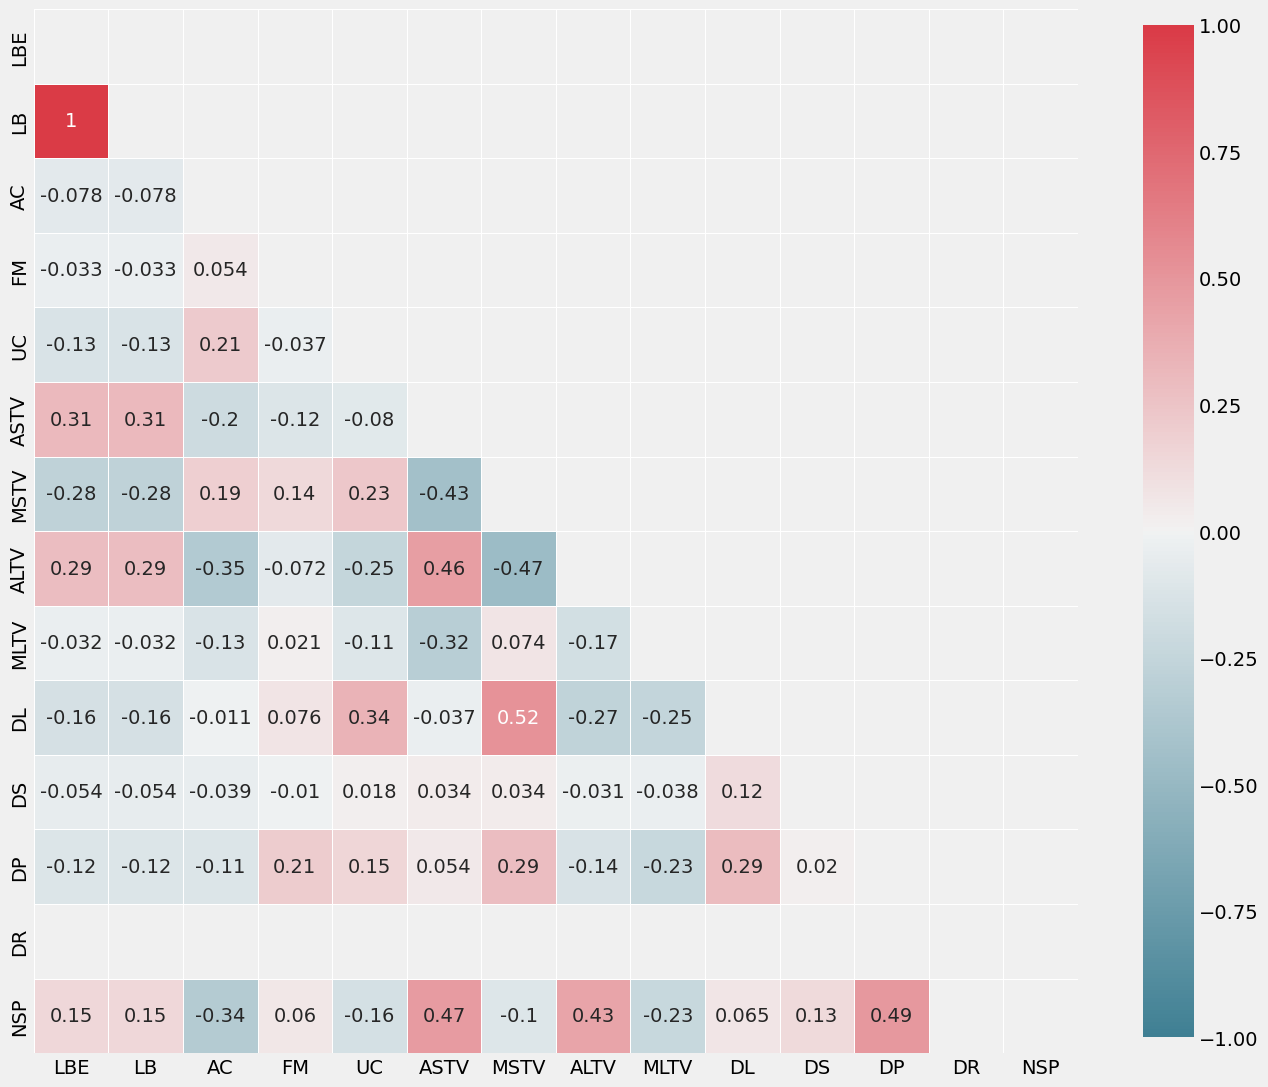

In [12]:
df_corr = df.corr(method='pearson')

mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15, 25))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_corr, mask=mask,  vmax=1, vmin=-1, cmap=cmap,
            center=0, square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})

A más intenso sea el color azul menor será la correlación, mientras que a más rojo sea mayor correlados están. Las variables más relacionadas entre ellas son LB/LBE, DL/MSTV y NSP/DP. Por otro lado, las menos relacionadas son ALTV/MSTV, MSTV/ASTV y ALTV/AC

#### LB / LBE

Como LB y LBE tienen una correlación igual a 1 vamos a comprobar si efectivamente contienen los mismos valores.

In [13]:
fig = px.scatter(df, x="LB", y="LBE", marginal_x="histogram",
                 marginal_y="histogram", trendline="ols", trendline_color_override="red")
fig.show()

Como se observa lo que ya pensábamos, procederemos a eliminar una de las columnas para no tener datos redundantes.

In [14]:
df = df.drop(['LB'], axis=1)

## 3. Técnica de detección de anomalías 

### Isolation forest

Vamos a utilizar un entrenamiento para saber cuál es el mejor valor de contamination para entrenar el algoritmo.

In [15]:
X = df[['LBE', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV',
        'MLTV', 'DL', 'DS', 'DP', 'DR', 'NSP']].values

# Separamos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, np.zeros(X.shape[0]), test_size=0.3, random_state=42)

# Valores a probar
contamination_values = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]

# Lista de scores
train_scores = []
test_scores = []

# Loop over the contamination values
for contamination in contamination_values:
    # Instancia de Isolation Forest
    isolation_forest = IsolationForest(contamination=contamination)
    isolation_forest.fit(X_train)

    # Predecimos X_train
    train_predictions = isolation_forest.predict(X_train)
    train_scores.append(accuracy_score(y_train, train_predictions))

    # Predecimos X_test
    test_predictions = isolation_forest.predict(X_test)
    test_scores.append(accuracy_score(y_test, test_predictions))

best_contamination = contamination_values[np.argmax(test_scores)]

In [16]:
best_contamination

0.01

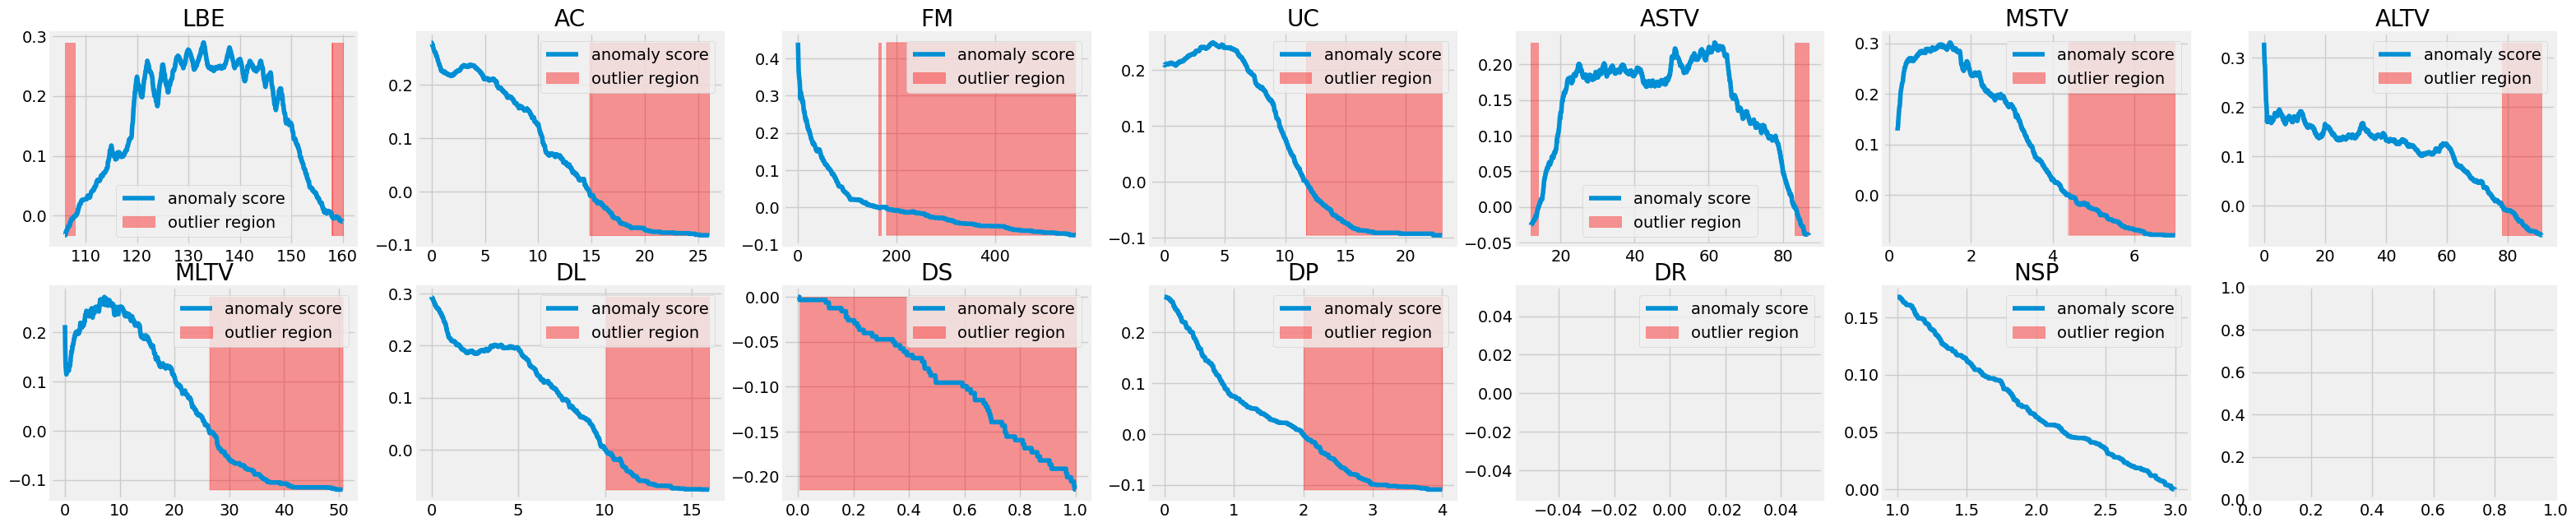

In [17]:
cols = ['LBE', 'AC', 'FM', 'UC', 'ASTV', 'MSTV',
        'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'NSP']

# Plotting los sub plot
fig, axs = plt.subplots(2, 7, figsize=(35, 7), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, column in enumerate(cols):
    # decidir metrica de umblral
    isolation_forest = IsolationForest(contamination=0.01)
    isolation_forest.fit(df[column].values.reshape(-1, 1))

    # funcion de decision del umbral
    xx = np.linspace(df[column].min(), df[column].max(),
                     len(df)).reshape(-1, 1)
    anomaly_score = isolation_forest.decision_function(xx)
    df['anomaly'] = outlier = isolation_forest.predict(xx)

    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                        where=outlier == -1, color='r',
                        alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)

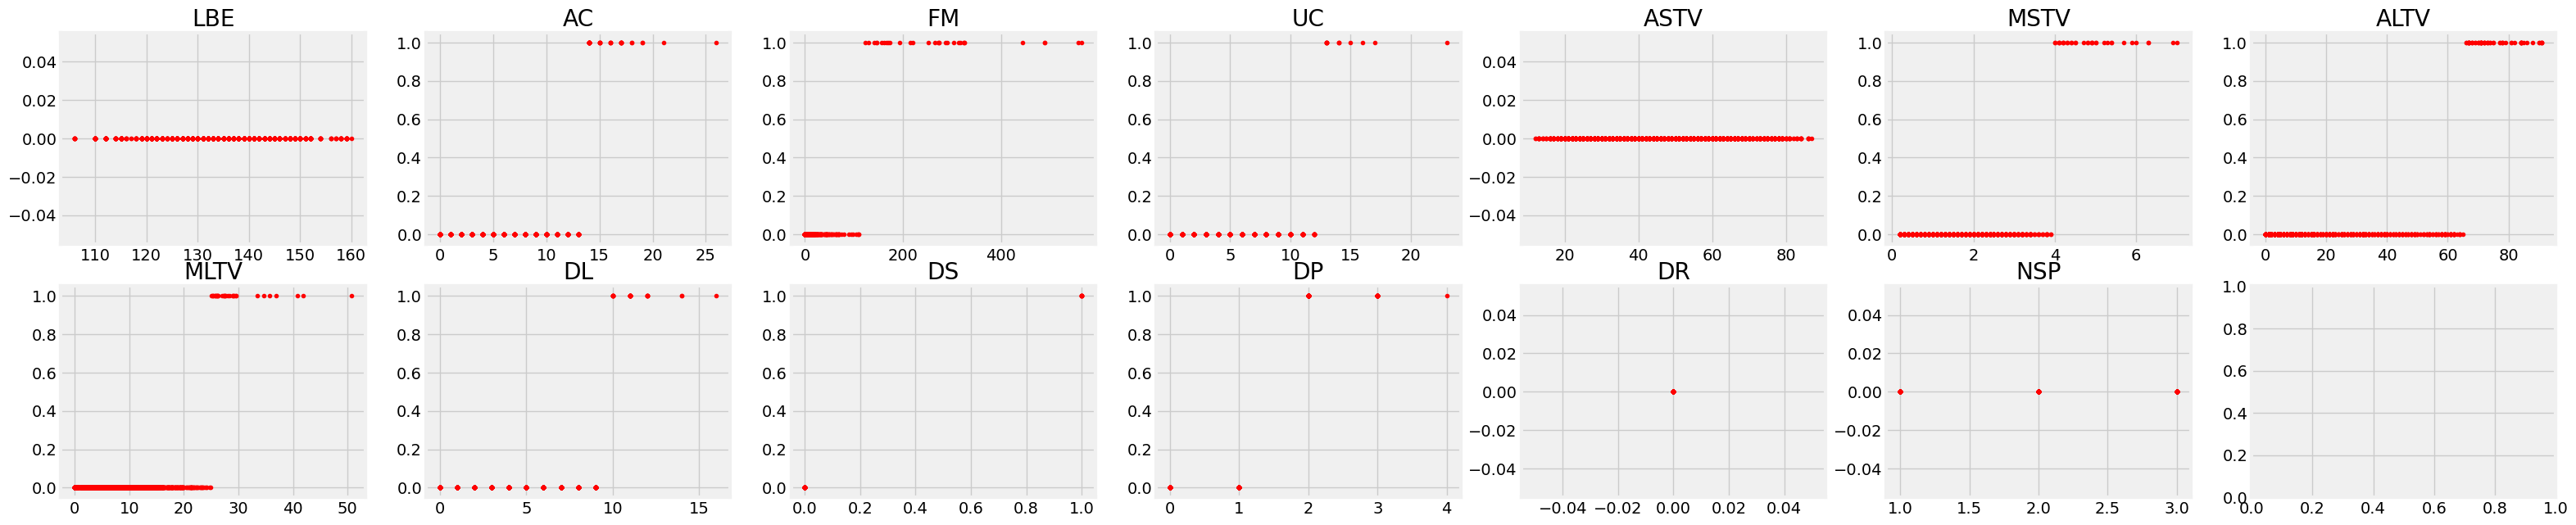

In [18]:
cols = ['LBE', 'AC', 'FM', 'UC', 'ASTV', 'MSTV',
        'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'NSP']

# Plotting los sub plot
fig, axs = plt.subplots(2, 7, figsize=(35, 7), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, column in enumerate(cols):
    mean = df[column].mean()
    std = df[column].std()
    df['anomaly'] = 0
    df.loc[(df[column] > mean + 3*std) | (df[column] < mean - 3*std), 'anomaly'] = 1
    
    axs[i].plot(df[column], df['anomaly'], 'ro', markersize=3)
    axs[i].set_title(column)

Se ha añadido una nueva columna 'anomaly' que nos indica el resultado de IF, -1 en la columna indica que es anomalía, 1 indica valor normal.

In [19]:
df

LBE   AC   FM   UC  ASTV  MSTV  ALTV  MLTV   DL   DS   DP   DR  NSP  \
0     120.0  0.0  0.0  0.0  73.0   0.5  43.0   2.4  0.0  0.0  0.0  0.0  2.0   
1     132.0  4.0  0.0  4.0  17.0   2.1   0.0  10.4  2.0  0.0  0.0  0.0  1.0   
2     133.0  2.0  0.0  5.0  16.0   2.1   0.0  13.4  2.0  0.0  0.0  0.0  1.0   
3     134.0  2.0  0.0  6.0  16.0   2.4   0.0  23.0  2.0  0.0  0.0  0.0  1.0   
4     132.0  4.0  0.0  5.0  16.0   2.4   0.0  19.9  0.0  0.0  0.0  0.0  1.0   
...     ...  ...  ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  ...   
2121  140.0  0.0  0.0  6.0  79.0   0.2  25.0   7.2  0.0  0.0  0.0  0.0  2.0   
2122  140.0  1.0  0.0  9.0  78.0   0.4  22.0   7.1  0.0  0.0  0.0  0.0  2.0   
2123  140.0  1.0  0.0  7.0  79.0   0.4  20.0   6.1  0.0  0.0  0.0  0.0  2.0   
2124  140.0  1.0  0.0  9.0  78.0   0.4  27.0   7.0  0.0  0.0  0.0  0.0  2.0   
2125  142.0  1.0  1.0  5.0  74.0   0.4  36.0   5.0  0.0  0.0  0.0  0.0  1.0   

      anomaly  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
2121        0  
2122        0  
2123        0  
2124        0  
2125        0  

[2126 rows x 14 columns]

### Local Outlier Factor Method (LOF)

Vamos a utilizar un entrenamiento para saber cuál es el mejor valor de contamination para entrenar el algoritmo.

In [20]:
X = df[['LBE', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV',
        'MLTV', 'DL', 'DS', 'DP', 'DR', 'NSP']].values

# Separamos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, np.zeros(X.shape[0]), test_size=0.3, random_state=42)

# Valores a probar 
contamination_values = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]

# Lista de scores
train_scores = []
test_scores = []

for contamination in contamination_values:
    # Instancia de LocalOutlierFactor
    lof = LocalOutlierFactor(novelty=True, contamination=contamination)
    lof.fit(X_train)

    # Predecimos X_train
    train_predictions = lof.predict(X_train)
    train_scores.append(accuracy_score(y_train, train_predictions))

    # Predecimos X_test
    test_predictions = lof.predict(X_test)
    test_scores.append(accuracy_score(y_test, test_predictions))

best_contamination = contamination_values[np.argmax(test_scores)]

In [21]:
best_contamination

0.01

In [22]:
clf_LOF = LocalOutlierFactor(n_neighbors=50, contamination=0.01)
X = df[['LBE', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV',
        'MLTV', 'DL', 'DS', 'DP', 'DR', 'NSP']].values
y_pred = clf_LOF.fit_predict(X)

In [23]:
clf_LOF.negative_outlier_factor_

array([-1.16752657, -1.09101316, -1.172804  , ..., -1.07974195,
       -1.07245448, -1.00241722])

Se considera que un outlier es un valor que está más lejos del promedio que los demás valores. Los inliers, por otro lado, son valores que están más cerca del promedio y son considerados "normales" o "comunes" en el conjunto de datos.

In [24]:
df["Outlier"] = y_pred
df_outliers = df[df["Outlier"] == -1]
df_inliers = df[df["Outlier"] == 1]

In [25]:
df_outliers

LBE   AC     FM   UC  ASTV  MSTV  ALTV  MLTV   DL   DS   DP   DR  NSP  \
14   130.0  7.0  489.0  5.0  21.0   2.3   0.0   7.9  6.0  0.0  1.0  0.0  1.0   
15   130.0  4.0  273.0  3.0  19.0   2.3   0.0   8.7  3.0  0.0  1.0  0.0  1.0   
16   130.0  4.0  290.0  3.0  24.0   2.1   0.0  10.9  3.0  0.0  0.0  0.0  1.0   
17   131.0  1.0  251.0  2.0  18.0   2.4   0.0  13.9  3.0  0.0  1.0  0.0  2.0   
18   130.0  2.0  317.0  4.0  23.0   1.9   0.0   8.8  3.0  0.0  1.0  0.0  1.0   
19   130.0  6.0  557.0  6.0  29.0   1.7   0.0   7.8  5.0  0.0  1.0  0.0  1.0   
20   129.0  0.0  304.0  4.0  30.0   2.1   0.0   8.5  2.0  0.0  3.0  0.0  3.0   
21   128.0  3.0  272.0  2.0  26.0   1.7   0.0   6.7  2.0  0.0  1.0  0.0  1.0   
22   128.0  0.0  219.0  2.0  34.0   2.5   0.0   4.0  2.0  0.0  2.0  0.0  3.0   
689  133.0  5.0  489.0  5.0  21.0   2.3   0.0  15.7  4.0  0.0  1.0  0.0  2.0   
690  133.0  0.0  173.0  2.0  18.0   2.7   0.0  21.5  1.0  0.0  1.0  0.0  3.0   
691  133.0  4.0  265.0  2.0  25.0   1.7   0.0  13.3  2.0  0.0  0.0  0.0  1.0   
692  133.0  5.0  286.0  3.0  24.0   2.1   0.0  13.4  3.0  0.0  0.0  0.0  1.0   
693  133.0  5.0  564.0  6.0  29.0   1.7   0.0   9.5  4.0  0.0  1.0  0.0  1.0   
694  133.0  4.0  314.0  3.0  35.0   1.3   0.0   5.4  2.0  0.0  0.0  0.0  1.0   
695  133.0  2.0  324.0  4.0  24.0   1.9   0.0   5.7  3.0  0.0  1.0  0.0  1.0   
696  133.0  4.0  273.0  3.0  32.0   1.6   0.0   8.4  1.0  0.0  0.0  0.0  1.0   
697  131.0  1.0  443.0  4.0  29.0   2.0   0.0   8.1  4.0  0.0  2.0  0.0  3.0   
698  131.0  0.0  214.0  2.0  34.0   2.2   0.0   3.8  2.0  0.0  1.0  0.0  3.0   
699  130.0  1.0  325.0  3.0  25.0   1.9   0.0   8.3  4.0  0.0  1.0  0.0  2.0   
700  130.0  0.0  325.0  3.0  29.0   2.2   0.0   7.8  3.0  0.0  3.0  0.0  3.0   
701  131.0  0.0  193.0  1.0  61.0   1.9   0.0  12.3  1.0  0.0  1.0  0.0  3.0   

     anomaly  Outlier  
14         0       -1  
15         0       -1  
16         0       -1  
17         0       -1  
18         0       -1  
19         0       -1  
20         0       -1  
21         0       -1  
22         0       -1  
689        0       -1  
690        0       -1  
691        0       -1  
692        0       -1  
693        0       -1  
694        0       -1  
695        0       -1  
696        0       -1  
697        0       -1  
698        0       -1  
699        0       -1  
700        0       -1  
701        0       -1

In [26]:
df_inliers

LBE   AC   FM   UC  ASTV  MSTV  ALTV  MLTV   DL   DS   DP   DR  NSP  \
0     120.0  0.0  0.0  0.0  73.0   0.5  43.0   2.4  0.0  0.0  0.0  0.0  2.0   
1     132.0  4.0  0.0  4.0  17.0   2.1   0.0  10.4  2.0  0.0  0.0  0.0  1.0   
2     133.0  2.0  0.0  5.0  16.0   2.1   0.0  13.4  2.0  0.0  0.0  0.0  1.0   
3     134.0  2.0  0.0  6.0  16.0   2.4   0.0  23.0  2.0  0.0  0.0  0.0  1.0   
4     132.0  4.0  0.0  5.0  16.0   2.4   0.0  19.9  0.0  0.0  0.0  0.0  1.0   
...     ...  ...  ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  ...   
2121  140.0  0.0  0.0  6.0  79.0   0.2  25.0   7.2  0.0  0.0  0.0  0.0  2.0   
2122  140.0  1.0  0.0  9.0  78.0   0.4  22.0   7.1  0.0  0.0  0.0  0.0  2.0   
2123  140.0  1.0  0.0  7.0  79.0   0.4  20.0   6.1  0.0  0.0  0.0  0.0  2.0   
2124  140.0  1.0  0.0  9.0  78.0   0.4  27.0   7.0  0.0  0.0  0.0  0.0  2.0   
2125  142.0  1.0  1.0  5.0  74.0   0.4  36.0   5.0  0.0  0.0  0.0  0.0  1.0   

      anomaly  Outlier  
0           0        1  
1           0        1  
2           0        1  
3           0        1  
4           0        1  
...       ...      ...  
2121        0        1  
2122        0        1  
2123        0        1  
2124        0        1  
2125        0        1  

[2104 rows x 15 columns]

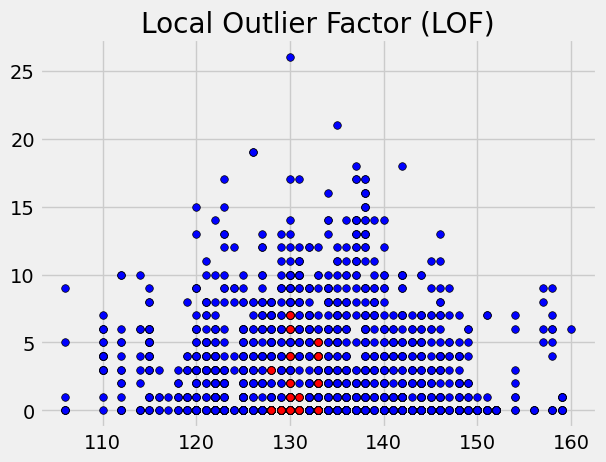

In [27]:
in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")

# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c='blue',
                edgecolor='k', s=30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c='red',
                edgecolor='k', s=30)

plt.show()

## 4. Técnica de agrupamiento

### K-means

Determinar el número óptimo de clusters en KMeans es un problema subyacente que se debe abordar antes de entrenar el modelo. Hay varios métodos para determinar el número de clusters óptimos en kmeans, uno de los métodos más comunes es el método del codo. Este consiste en graficar la suma de las distancias cuadradas intra-cluster (WCSS) contra el número de clusters y elegir el número de clusters en el punto donde la curva empieza a aplanarse (o "doblar el codo").

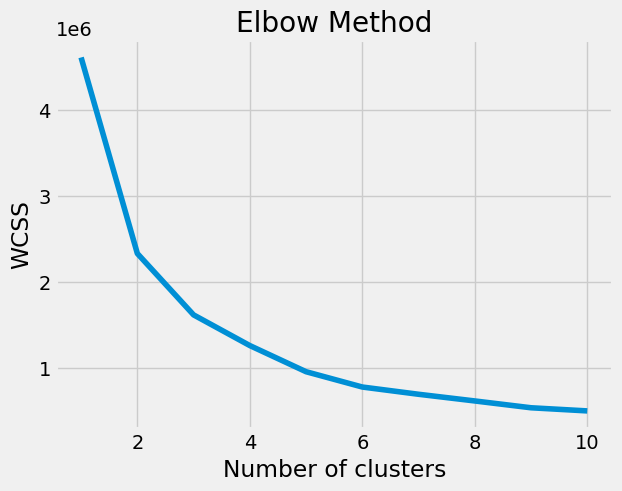

In [28]:
# Seleccionamos las columnas del dataset para ser utilizadas en el modelo
X = df[['LBE', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV',
        'MLTV', 'DL', 'DS', 'DP', 'DR', 'NSP']].values

# Inicializamos una lista para guardar el valor de la "Within Cluster Sum of Squares" (WCSS)
# para cada número de clusters
wcss = []

# Iteramos desde 1 hasta 11 clusters
for i in range(1, 11):
    # Inicializamos un modelo KMeans con n_clusters igual a i
    kmeans = KMeans(n_clusters=i, init='k-means++',
                    max_iter=300, n_init=10, random_state=0)
    # Ajustamos el modelo con los datos de entrada X
    kmeans.fit(X)
    # Agregamos el valor de WCSS del modelo a la lista wcss
    wcss.append(kmeans.inertia_)

# Graficamos la "Elbow Method" para ver el número óptimo de clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Como el punto de flexión es en el 2, ese será el número utilizado en el entrenamiento.

In [29]:
clf_KMeans = KMeans(n_clusters=2, random_state=0, n_init="auto")
clf_KMeans.fit(df)

# obtener los clusters
clusters_KM = clf_KMeans.labels_

# agregar las etiquetas de cluster a los datos
df['Cluster_KMEANS'] = clusters_KM

In [30]:
print("Centroides: \n", clf_KMeans.cluster_centers_)

Centroides: 
 [[1.35952911e+02 2.21404110e+00 2.15839041e+00 3.64726027e+00
  6.00796233e+01 1.04469178e+00 1.66678082e+01 6.52131849e+00
  1.64041096e+00 4.28082192e-03 1.42979452e-01 0.00000000e+00
  1.50000000e+00 0.00000000e+00 1.00000000e+00]
 [1.30074113e+02 3.34237996e+00 1.34384134e+01 3.67536534e+00
  3.10313152e+01 1.68402923e+00 1.53027140e+00 1.02192067e+01
  1.48434238e+00 2.08768267e-03 1.05427975e-01 0.00000000e+00
  1.06576200e+00 0.00000000e+00 9.54070981e-01]]


Vemos los resultados

In [31]:
df

LBE   AC   FM   UC  ASTV  MSTV  ALTV  MLTV   DL   DS   DP   DR  NSP  \
0     120.0  0.0  0.0  0.0  73.0   0.5  43.0   2.4  0.0  0.0  0.0  0.0  2.0   
1     132.0  4.0  0.0  4.0  17.0   2.1   0.0  10.4  2.0  0.0  0.0  0.0  1.0   
2     133.0  2.0  0.0  5.0  16.0   2.1   0.0  13.4  2.0  0.0  0.0  0.0  1.0   
3     134.0  2.0  0.0  6.0  16.0   2.4   0.0  23.0  2.0  0.0  0.0  0.0  1.0   
4     132.0  4.0  0.0  5.0  16.0   2.4   0.0  19.9  0.0  0.0  0.0  0.0  1.0   
...     ...  ...  ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  ...   
2121  140.0  0.0  0.0  6.0  79.0   0.2  25.0   7.2  0.0  0.0  0.0  0.0  2.0   
2122  140.0  1.0  0.0  9.0  78.0   0.4  22.0   7.1  0.0  0.0  0.0  0.0  2.0   
2123  140.0  1.0  0.0  7.0  79.0   0.4  20.0   6.1  0.0  0.0  0.0  0.0  2.0   
2124  140.0  1.0  0.0  9.0  78.0   0.4  27.0   7.0  0.0  0.0  0.0  0.0  2.0   
2125  142.0  1.0  1.0  5.0  74.0   0.4  36.0   5.0  0.0  0.0  0.0  0.0  1.0   

      anomaly  Outlier  Cluster_KMEANS  
0           0        1               0  
1           0        1               1  
2           0        1               1  
3           0        1               1  
4           0        1               1  
...       ...      ...             ...  
2121        0        1               0  
2122        0        1               0  
2123        0        1               0  
2124        0        1               0  
2125        0        1               0  

[2126 rows x 16 columns]

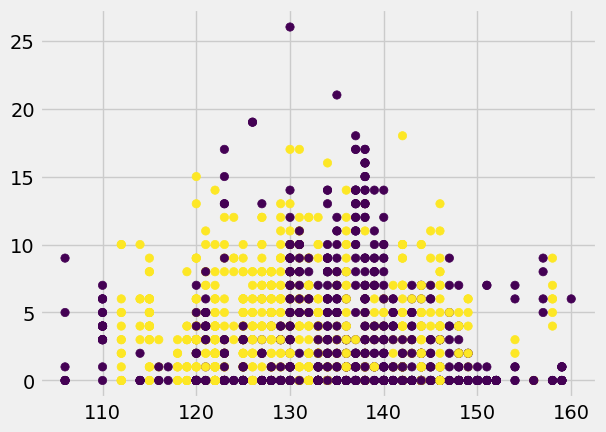

In [32]:
plt.scatter(X[:, 0], X[:, 1], c=clusters_KM)

### DBSCAN

Primero hay que calcular el valor óptimo de eps y min_samples en DBSCAN. 

In [33]:
X = df[['LBE', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'NSP']].values

# Hacemos un grid search para encontrar los valores óptimos de eps y min_samples
eps_values = np.linspace(0.1, 1.0, 10)
min_samples_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
best_score = -1
best_params = None
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        if len(set(labels)) > 1:
            score = silhouette_score(X, labels)
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)

# Mostramos los valores óptimos encontrados
print("Valores óptimos encontrados: eps={}, min_samples={}".format(*best_params))

Valores óptimos encontrados: eps=0.1, min_samples=3


In [34]:
clf_DBSCAN = DBSCAN(eps=0.1, min_samples=3)
clusters_DB = clf_DBSCAN.fit_predict(df)

# Agregar la columna de clusters al dataframe
df['Cluster_DBSCAN'] = clusters_DB

Vemos los resultados y la nueva columna del df

In [35]:
print("Número de clusters encontrados: ", len(set(clusters_DB)))
print("Distribución de los clusters:")
print(df['Cluster_DBSCAN'].value_counts())

Número de clusters encontrados:  2
Distribución de los clusters:
-1    2122
 0       4
Name: Cluster_DBSCAN, dtype: int64


In [36]:
df

LBE   AC   FM   UC  ASTV  MSTV  ALTV  MLTV   DL   DS   DP   DR  NSP  \
0     120.0  0.0  0.0  0.0  73.0   0.5  43.0   2.4  0.0  0.0  0.0  0.0  2.0   
1     132.0  4.0  0.0  4.0  17.0   2.1   0.0  10.4  2.0  0.0  0.0  0.0  1.0   
2     133.0  2.0  0.0  5.0  16.0   2.1   0.0  13.4  2.0  0.0  0.0  0.0  1.0   
3     134.0  2.0  0.0  6.0  16.0   2.4   0.0  23.0  2.0  0.0  0.0  0.0  1.0   
4     132.0  4.0  0.0  5.0  16.0   2.4   0.0  19.9  0.0  0.0  0.0  0.0  1.0   
...     ...  ...  ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  ...   
2121  140.0  0.0  0.0  6.0  79.0   0.2  25.0   7.2  0.0  0.0  0.0  0.0  2.0   
2122  140.0  1.0  0.0  9.0  78.0   0.4  22.0   7.1  0.0  0.0  0.0  0.0  2.0   
2123  140.0  1.0  0.0  7.0  79.0   0.4  20.0   6.1  0.0  0.0  0.0  0.0  2.0   
2124  140.0  1.0  0.0  9.0  78.0   0.4  27.0   7.0  0.0  0.0  0.0  0.0  2.0   
2125  142.0  1.0  1.0  5.0  74.0   0.4  36.0   5.0  0.0  0.0  0.0  0.0  1.0   

      anomaly  Outlier  Cluster_KMEANS  Cluster_DBSCAN  
0           0        1               0              -1  
1           0        1               1              -1  
2           0        1               1              -1  
3           0        1               1              -1  
4           0        1               1              -1  
...       ...      ...             ...             ...  
2121        0        1               0              -1  
2122        0        1               0              -1  
2123        0        1               0              -1  
2124        0        1               0              -1  
2125        0        1               0              -1  

[2126 rows x 17 columns]

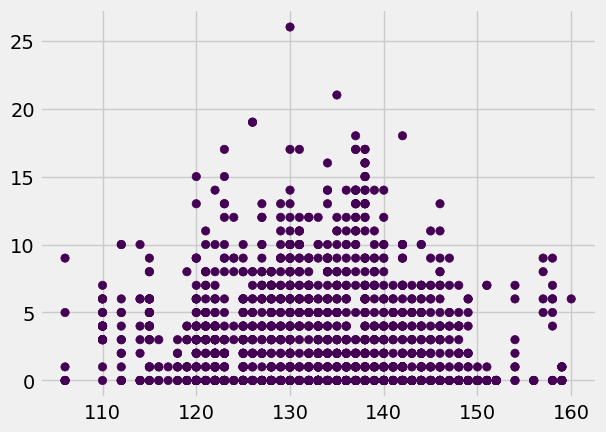

In [37]:
plt.scatter(X[:, 0], X[:, 1], c=clusters_DB)

## 5. Conclusiones

**Detección de anomalías**

Isolation Forest y Local Outlier Factor (LOF) son dos técnicas diferentes para la detección de anomalías en datos. Ambas técnicas se utilizan para identificar puntos que son significativamente diferentes de su entorno.

- Isolation Forest es un algoritmo de detección de anomalías basado en árboles de decisión. El algoritmo funciona construyendo un número de árboles de decisión y utiliza el número de ramas requerido para aislar un punto como su medida de anormalidad. Un punto con una medida de anormalidad más baja es considerado más anómalo.
- Por otro lado, Local Outlier Factor (LOF) es un algoritmo basado en vecinos. LOF funciona comparando la densidad de un punto con la densidad de sus vecinos más cercanos. Si la densidad de un punto es significativamente diferente de la densidad de sus vecinos, entonces el punto es considerado como una anomalia.

En resumen, Isolation Forest se basa en árboles de decisión y utiliza una medida basada en la cantidad de ramas requeridas para aislar un punto, mientras que LOF es un algoritmo basado en vecinos y utiliza una medida basada en la comparación de la densidad de un punto con la densidad de sus vecinos más cercanos. Ambas técnicas tienen sus ventajas y desventajas, por lo que es importante evaluar cuidadosamente cuál es la más adecuada para el problema específico que se está abordando.

**Técnicas de agrupamiento**

K-means y DBSCAN son dos técnicas de agrupamiento diferentes que se pueden aplicar a un mismo conjunto de datos. La principal diferencia entre ambas es la forma en que se definen los grupos o clusters de datos.

- En K-means, se especifica un número k de grupos previamente, y los datos se asignan a un grupo basados en la distancia euclidiana entre ellos y el centroide (punto medio) del grupo. El objetivo es minimizar la suma de las distancias al cuadrado entre los puntos y su centroide correspondiente. Este algoritmo es sensible a la elección de los centroides iniciales y puede resultar en soluciones subóptimas.
- Por otro lado, DBSCAN (Density-Based Spatial Clustering of Applications with Noise) no requiere especificar un número previo de grupos. En su lugar, se define un radio eps y un número mínimo de puntos min_samples para formar un cluster. Los puntos que están dentro del radio eps de un punto dado y tienen al menos min_samples puntos cercanos se agrupan en un mismo cluster. Además, DBSCAN es capaz de detectar grupos con formas irregulares, mientras que K-means solo puede detectar grupos con formas redondas.

En resumen, K-means es adecuado para detectar grupos de forma redonda y conocer el número de grupos previamente, mientras que DBSCAN es más adecuado para detectar grupos con formas irregulares y no requiere conocer el número de grupos previamente. En cuanto al rendimiento, DBSCAN suele ser más rápido que K-means en grandes conjuntos de datos, pero también es más propenso a errores si los parámetros eps y min_samples no se eligen adecuadamente. Si el scatter resultante de KMeans sale de dos colores y el de DBSCAN sale de un solo color, significa que los algoritmos han identificado diferentes estructuras en los datos.